## 앙상블 기법- randomForest

### 학습 내용
### 01. 랜덤 포레스트의 배경와 원리에 대해 알아본다.
### 02. 랜덤 포레스트의 파라미터에 대해 알아본다.
### 03. 트리에서 사용하는 변수의 중요도에 대해서 체크해보고 알아본다.
### 04. 의사결정트리와 선형회귀를 그래프를 통해 확인하고 알아본다.

## 머신러닝 작업 flow
<img src="img/machineWorkflow01.png">
http://dataaspirant.com/2017/06/26/random-forest-classifier-python-scikit-learn/ 참조

## 01. 결정 트리 시각화
<pre>
(1) export_graphviz 함수를 이용하여 트리를 시각화 할 수 있다.
(2) 그래프 저장용 텍스트 파일 포맷 .dot 파일을 만든다.
</pre>

In [113]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# 한글
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

In [57]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    test_size = 0.3,
                                                    random_state=77)

tree.fit(X_train, y_train)
export_graphviz(tree, out_file="tree.dot", class_names=['mal', 'god'],
               feature_names=cancer.feature_names,
               impurity=False, filled=True)

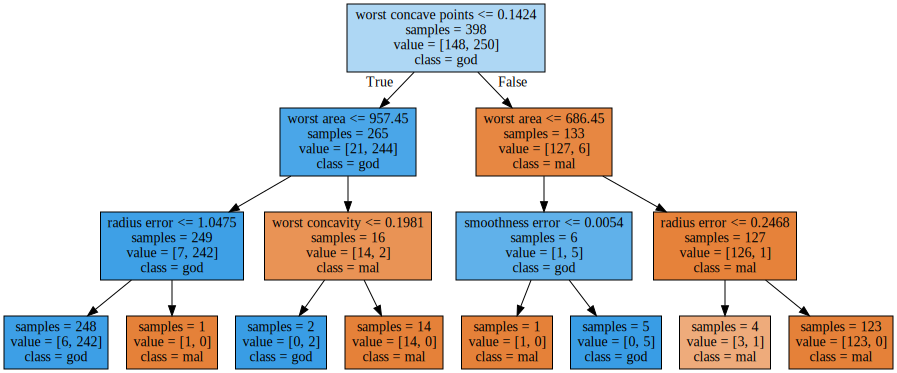

In [52]:
import graphviz 
from IPython.display import display

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### [설명]
<pre>
samples => 샘플의 수
value  => 클래스당 샘플의 수
clss  => 클래스
</pre>

## 02 트리의 특성 중요도
<pre>
트리(Tree)를 만드는 각 특성(feature)이 얼마나 중요한지 판단.
1 : 완벽하게 예측
0 : 전혀 사용하지 않았다.
</pre>

In [53]:
print("특성 중요도 : \n{}".format(tree.feature_importances_))

특성 중요도 : 
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01378532  0.          0.          0.
  0.00964953  0.          0.          0.          0.          0.          0.
  0.          0.          0.1700614   0.          0.          0.02026401
  0.78623973  0.          0.        ]


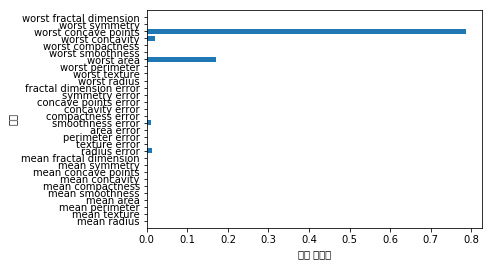

In [59]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

## 03 의사결정트리 vs 선형회귀

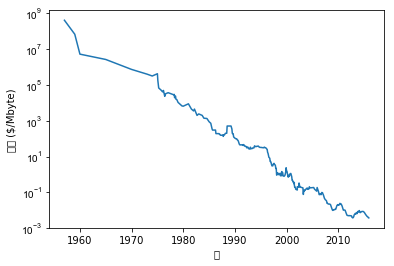

In [64]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [65]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

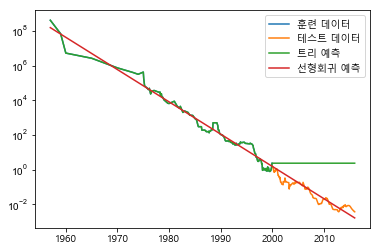

In [68]:
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

<pre>
두 모델은 확연한 차이를 보인다.
(1) 선형모델은 직선으로 데이터를 근사한다.
(2) 트리모델은 훈련 데이터를 완벽하게 예측한다.
(3) 트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없다. 
    (3)번의 내용이 트리 기반 모델의 공통된 단점이다.
</pre>

### 트리모델의 모델 복잡도 조절 매개 변수
### max_depth : 트리의 깊이 
### max_leaf_nodes : 최대 leaf 노드의 수
### min_samples_leaf : 노드가 분할하기 위한 잎노드의 최소 데이터 개수

### 결정 트리의 장점
<pre>
첫째, 만들어진 모델을 쉽게 시각화할 수 있어서, 비전문가도 이해하기 쉽다.
둘째, 데이터의 스케일에 구애받지 않는다.(정규화, 표준화 전처리 과정 필요 없다.)
</pre>

### 결정 트리의 단점
<pre>
사전 가지치기의 사용하지만 과대적합 되는 경향이 있다.
</pre>

## 04 (Decision Tree)결정 트리의 앙상블

### 앙상블(ensemble)란?
<pre>
여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다.

랜덤 포레스트(random forest)와 그래디언트 부스팅(gradient boosting)결정 트리는 
모델을 구성하는 기본 요소로 <font size=4 color=blue>결정 트리</font>를 사용한다.
</pre>

## 가. 랜덤 포레스트(random forest)
<pre>
배경 : 의사 결정 트리는 훈련 데이터에 과대적합되는 경향이 있다.
원리 : 조금씩 다른 여러 결정 트리의 묶음. 트리를 많이 만들고 이에 대한 결과의 평균값을 내면 과대적합을 줄일 수 있지 않을까?
이렇게 하면 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어든다는 것이 수학적으로 증명됨.

(1) 만들어지는 각각의 트리는 타깃 예측을 잘해야 한다. 그리고 다른 트리와 구별되어야 한다. 
(2) 랜덤 포레스트는 각각의 트리가 달라지도록 트리 생성 시에 무작위성을 주입한다.
(3) 트리를 랜덤하게 만드는 방법은 2가지
----- <font size=4 color=blue>데이터 포인터를 무작위로 선택하는 방법</font>
----- <font size=4 color=blue>분할 테스트(노드 데이터 조건) feature(특성)을 무작위로 선택</font>
</pre>

## 나. 랜덤 포레스트 구축
<pre>
(1) 생성할 <font size=4 color=blue>트리의 개수(n_estimators)</font>를 선택한다.
(2) <font size=4 color=blue>부트 스트랩 샘플(bootstrap sample)</font>을 생성
    --- n_samples개의 데이터 포인터 중에서 무작위로 데이터 n_samples 횟수만큼 반복 추출.(중복 추출 될 수 있음)
    * 중복 추출로 인해(대략 1/3정도) 누락될 수 있다. 또는 중복된 데이터가 있을 수 있다.
(3) 생성된 데이터 셋으로 결정 트리를 만든다. 단, 여기서 특성(feature)는 <font size=4 color=blue>무작위로 선택된 특성 중</font>에서 
    최선의 테스트(조건)을 고른다. (max_features 매개변수로 <font size=4 color=blue>몇 개의 feature를 고를지</font>는 선택이 가능하다.)
    ==> max_feature 값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고, 가장 두드러진 특성을 이용해 데이터에 잘 맞춰진다.
    ==> max_feature를 낮추면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어진다.
    
-----> 결과적으로 부트스트랩 샘플링은 랜덤 포레스트의 트리가 <font size=4 color=blue>조금씩 다른 데이터셋을 이용</font>해 만들어지도록 한다.
-----> 각각의 트리는 <font size=4 color=blue>전체 특성(feature)의 일부만을 사용</font>한다.
</pre>

## 다. 랜덤 포레스트 분석

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
print(X.shape, y.shape)
y

(100, 2) (100,)


array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)  # 5개의 트리 
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [110]:
# 학습된 랜덤포레스트의 트리 모델
print(forest.estimators_)
print(forest.score)
print("\n\n{}".format(forest.base_estimator))

print("\n\n{}".format(forest.bootstrap))
print("\n\n{}".format(forest.criterion))
print("\n\n{}".format(forest.oob_score))

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1872583848, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=794921487, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=111352301, splitter='best'), DecisionTreeClassifier(class_weight=No

### ravel() 함수 이해하기

Original array : 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

ravel() :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


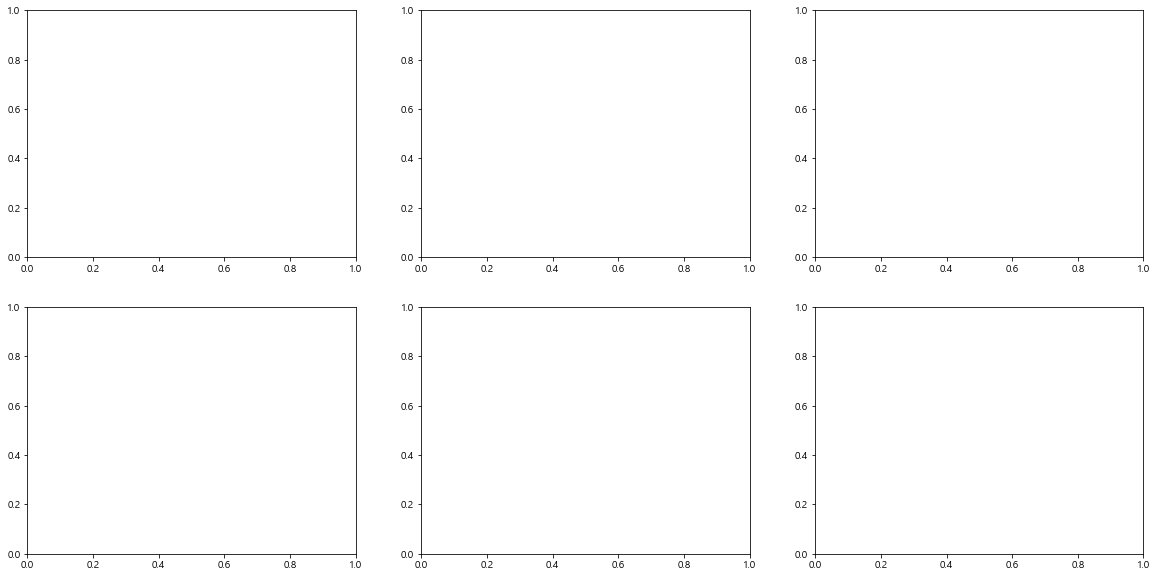

In [85]:
fig1, axes1 = plt.subplots(2,3, figsize=(20,10))  # 2행, 3열의 사이즈 20, 10으로 그리기
# axes1.ravel()
import numpy as np

array = np.arange(15).reshape(3, 5)
print("Original array : \n", array)
print("\nravel() : ", array.ravel())

### enumerate 이해

In [98]:
for i, name in enumerate(['body', 'foo', 'bar']):
    print(i, name)

0 body
1 foo
2 bar


### zip 의 이해

In [100]:
#print(zip(axes.ravel(), forest.estimators_))
for i1, i2 in zip([11,12,13], [4,5,6]):
    print(i1, i2)

11 4
12 5
13 6


In [96]:
type()

zip

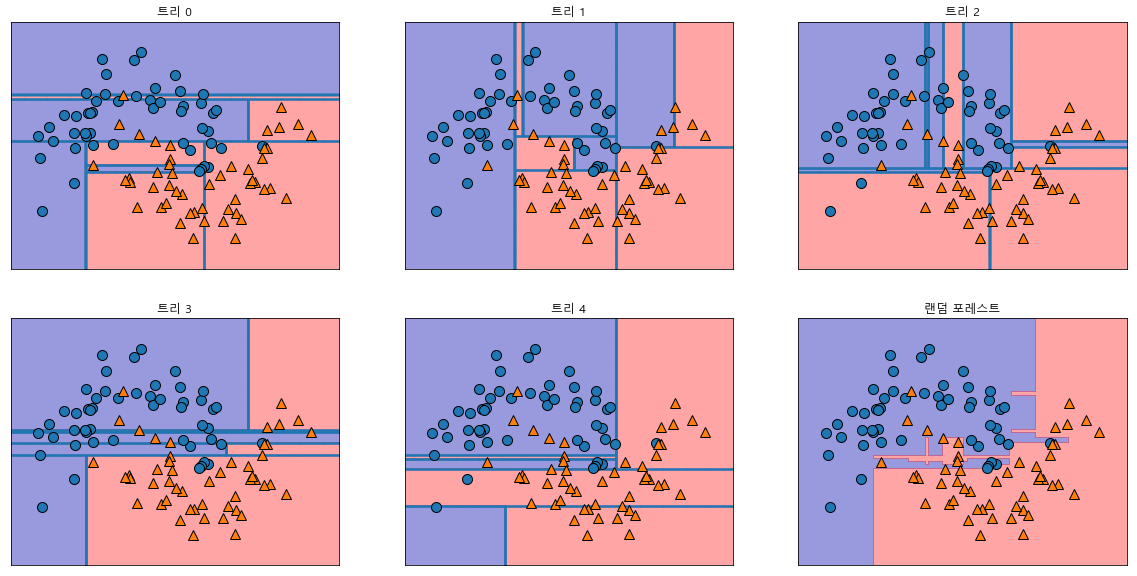

In [102]:
fig, axes = plt.subplots(2,3, figsize=(20,10))  # 2행, 3열의 사이즈 20, 10으로 그리기

# 각각의 트리에 각각의 트리 객체 대입
# 1단계 : zip에 의해 그래프객체1~6(ax), 모델객체1~6(tree)
# 2단계 : enumerate에 의해 인덱스 부여
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):  
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0],X[:,1], y)

## 실습 1
<pre>
데이터 셋 : 유방암 데이터 셋
위의 데이터 셋을 이용하여 모델을 만들어보자.
(1) 랜덤 포레스트를 이용하여 훈련 세트 정확도, 테스트 세트 정확도를 확인해 보자.
(랜덤 포레스트 트리의 개수 = 5개, random_state=0, 최대 변수 선택 = 4)
</pre>

## 실습 1 풀이

In [128]:
# 01 데이터 셋 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 02 데이터 셋 나누기 및 학습
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)  # 5개의 트리 
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [129]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.958


In [130]:
# 5개의 모델에 대한 정확도 평가
for model in forest.estimators_:
    model.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.958
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.923
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.951
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


In [131]:
print(forest.feature_importances_)
print(forest.max_features)
print(forest.n_features_)
print(forest.oob_score)
print(forest)

[ 0.          0.01226443  0.00160554  0.12919727  0.01380144  0.01000016
  0.00240085  0.17205546  0.00389807  0.00304871  0.01171708  0.01206883
  0.          0.00712283  0.00188887  0.00302627  0.          0.00675665
  0.          0.0054606   0.28981717  0.03132555  0.15858617  0.01797894
  0.01314885  0.00636359  0.03506172  0.00768609  0.01757438  0.0261445 ]
auto
30
False
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)


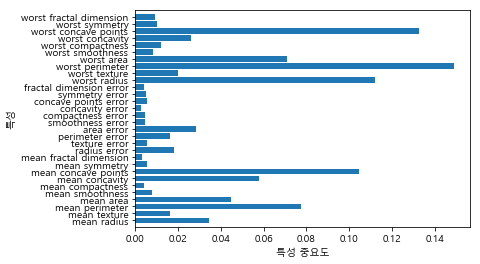

In [132]:
forest1 = RandomForestClassifier(n_estimators=100, random_state=0)  # 100개의 트리 
forest1.fit(X_train, y_train)
plot_feature_importances_cancer(forest1)

In [133]:
print(forest1.feature_importances_)
print(forest1.max_features)
print(forest1.n_features_)
print(forest1.oob_score)
print(forest)

[ 0.03428109  0.01603486  0.07742074  0.04462701  0.00756603  0.00421043
  0.05773247  0.10465483  0.00561231  0.00310465  0.01828184  0.00550746
  0.01598658  0.02849289  0.00432991  0.00457692  0.00285285  0.00537969
  0.00521666  0.0038365   0.11200226  0.01973492  0.14912901  0.07116392
  0.00837159  0.01177922  0.02616743  0.13282975  0.00991387  0.00920232]
auto
30
False
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)


### Conclusion 
<pre>
(가) 회귀와 분류에 있어, 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다.
(나) 랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동한다.
(다) 만약 의사결정을 간소하게 해야 한다면 단일 트리를 사용할 수 있다.
(라) 랜덤 포레스트는 n_jobs를 이용하여 여러개의 코어를 이용하여 병렬 처리를 통해 속도 향상을 시킬 수 있다.
(마) 랜덤 포레스트는 트리가 많을 수록 random_state 값의 변화에 따른 변동이 적다.
(바) n_estimators는 클수록 좋다. ( 더 많은 트리는 과대 적합을 줄여준다.) 다만, 시간과 메모리의 문제가 발생
(사) max_features는 일반적으로 기본값을 쓰는 것이 좋다.
</pre>